# Data Preprocessing

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#Extracting dataset
df = pd.read_csv("YourCabs.csv")
df.head(10)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0
5,132518,17712,12,NaN,2,1021.0,1323.0,NaN,NaN,1/1/2013 22:30,NaN,0,0,1/1/2013 8:01,13.028530,77.546250,12.869805,77.653211,0
6,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,1/1/2013 9:45,41275.40625,0,0,1/1/2013 9:21,12.951850,77.696420,NaN,NaN,0
7,132520,22181,12,NaN,2,1192.0,832.0,NaN,NaN,1/1/2013 11:00,NaN,0,0,1/1/2013 9:39,12.976770,77.572700,12.880190,77.645580,0
8,132521,22182,65,2.0,3,448.0,NaN,NaN,NaN,1/1/2013 16:00,NaN,0,0,1/1/2013 9:44,12.927320,77.635750,NaN,NaN,0
9,132522,22184,12,NaN,2,516.0,376.0,NaN,NaN,1/1/2013 11:00,NaN,0,0,1/1/2013 9:49,13.005600,77.657990,12.902450,77.660810,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

In [4]:
df.shape

(43431, 19)

In [5]:
df.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

# Splitting Data into Train and Test Data

In [6]:
X = df.iloc[:, 1:18]
X

,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750
1,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640
2,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766
3,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140
4,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,41602.82020,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880
43427,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,41604.08037,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580
43428,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,41602.97917,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN
43429,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,41602.69495,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890


In [94]:
Y = df["Car_Cancellation"].values.reshape(-1,1)
Y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

## Performing split operations

In [9]:
from sklearn.model_selection import train_test_split

In [95]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size= 0.70, random_state= 15)


In [11]:
xtrain     #random rows of features only  (for training)

,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
12653,29419,12,NaN,2,393.0,376.0,NaN,NaN,5/8/2013 5:00,NaN,0,0,5/7/2013 22:20,13.19956,77.70688,12.902450,77.660810
7519,26861,85,NaN,2,393.0,1044.0,NaN,NaN,3/21/2013 22:45,NaN,0,0,3/21/2013 15:33,13.19956,77.70688,12.968887,77.644329
28752,40016,12,NaN,2,352.0,1054.0,15.0,NaN,8/19/2013 7:30,41505.35236,1,0,8/19/2013 0:06,13.03369,77.62821,12.901840,77.581587
39437,40862,12,NaN,1,1396.0,NaN,31.0,44.0,10/25/2013 22:00,41574.99931,0,0,10/25/2013 16:55,NaN,NaN,NaN,NaN
32544,42179,12,NaN,2,571.0,150.0,15.0,NaN,9/10/2013 8:00,41527.37938,1,0,9/9/2013 18:36,12.95185,77.69642,12.897240,77.610650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35483,43843,65,2.0,3,1096.0,NaN,NaN,NaN,9/29/2013 10:30,41546.81250,0,0,9/29/2013 9:24,12.96519,77.71932,NaN,NaN
39296,46094,65,NaN,1,393.0,NaN,15.0,49.0,10/25/2013 8:00,41572.00000,0,0,10/24/2013 19:35,13.19956,77.70688,NaN,NaN
2693,23919,12,NaN,2,1167.0,585.0,NaN,NaN,1/30/2013 4:30,NaN,1,0,1/29/2013 13:54,13.00037,77.72746,12.976770,77.572700
8076,27166,12,1.0,3,793.0,NaN,NaN,NaN,3/27/2013 13:00,NaN,0,0,3/27/2013 12:20,13.02239,77.59492,NaN,NaN


In [12]:
xtest     #random rows from features only (for testing)

,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
6198,32348,12,NaN,2,1226.0,1165.0,NaN,NaN,3/5/2013 19:45,NaN,1,0,3/5/2013 10:18,13.01508,77.67796,12.990947,77.687112
16415,27557,12,1.0,3,722.0,NaN,NaN,NaN,6/2/2013 12:45,NaN,0,0,6/2/2013 11:39,12.91567,77.55465,NaN,NaN
24605,37629,12,NaN,2,590.0,822.0,15.0,NaN,7/26/2013 16:00,41481.68399,0,0,7/26/2013 13:35,13.00826,77.56433,13.010240,77.580560
27112,29102,85,NaN,1,357.0,NaN,15.0,32.0,8/25/2013 7:30,41511.00000,0,0,8/9/2013 20:58,13.03064,77.64910,NaN,NaN
19316,30716,12,2.0,3,376.0,NaN,NaN,NaN,6/23/2013 7:00,NaN,0,0,6/22/2013 7:35,12.90245,77.66081,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9854,28374,85,2.0,3,520.0,NaN,NaN,NaN,4/14/2013 8:30,41378.00000,1,0,4/13/2013 15:41,12.92598,77.61837,NaN,NaN
14754,31606,28,NaN,2,1096.0,393.0,NaN,NaN,5/23/2013 5:45,NaN,0,0,5/22/2013 22:56,12.96519,77.71932,13.199560,77.706880
3049,14257,12,NaN,2,1239.0,1053.0,NaN,NaN,2/1/2013 23:30,NaN,0,0,2/1/2013 20:57,12.97251,77.61954,12.912799,77.589784
18002,33763,12,NaN,2,184.0,455.0,NaN,NaN,6/13/2013 7:00,NaN,1,0,6/12/2013 11:35,12.95871,77.56337,12.999874,77.678120


In [13]:
ytrain      #random rows from target only (y-pred)

12653    0
7519     0
28752    1
39437    0
32544    1
        ..
35483    0
39296    0
2693     0
8076     0
7624     0
Name: Car_Cancellation, Length: 30401, dtype: int64

In [14]:
ytest              #random rows from target only

6198     0
16415    0
24605    0
27112    0
19316    0
        ..
9854     0
14754    0
3049     0
18002    0
38821    0
Name: Car_Cancellation, Length: 13030, dtype: int64

#  Missing Value Treatment

In [15]:
xtrain.isnull().sum()

user_id                    0
vehicle_model_id           0
package_id             25098
travel_type_id             0
from_area_id              51
to_area_id              6385
from_city_id           18993
to_city_id             29319
from_date                  0
to_date                12509
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  54
from_long                 54
to_lat                  6385
to_long                 6385
dtype: int64

In [16]:
xtrain.shape

(30401, 17)

In [17]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30401 entries, 12653 to 7624
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              30401 non-null  int64  
 1   vehicle_model_id     30401 non-null  int64  
 2   package_id           5303 non-null   float64
 3   travel_type_id       30401 non-null  int64  
 4   from_area_id         30350 non-null  float64
 5   to_area_id           24016 non-null  float64
 6   from_city_id         11408 non-null  float64
 7   to_city_id           1082 non-null   float64
 8   from_date            30401 non-null  object 
 9   to_date              17892 non-null  float64
 10  online_booking       30401 non-null  int64  
 11  mobile_site_booking  30401 non-null  int64  
 12  booking_created      30401 non-null  object 
 13  from_lat             30347 non-null  float64
 14  from_long            30347 non-null  float64
 15  to_lat               24016 non-nu

In [18]:
#Checking %age of null values present in each column
xtrain["package_id"].isnull().sum()*100/xtrain.shape[0]  

82.55649485214302

In [19]:
xtrain["from_area_id"].isnull().sum()*100/xtrain.shape[0]

0.16775763955133055

In [20]:
xtrain["to_area_id"].isnull().sum()*100/xtrain.shape[0]

21.002598598730305

In [21]:
xtrain["from_city_id"].isnull().sum()*100/xtrain.shape[0]

62.47491858820433

In [22]:
xtrain["to_city_id"].isnull().sum()*100/xtrain.shape[0]

96.44090654912668

In [23]:
xtrain["to_date"].isnull().sum()*100/xtrain.shape[0]

41.146672806815566

In [24]:
xtrain["from_lat"].isnull().sum()*100/xtrain.shape[0]

0.17762573599552647

In [25]:
xtrain["from_long"].isnull().sum()*100/xtrain.shape[0]

0.17762573599552647

In [26]:
xtrain["to_lat"].isnull().sum()*100/xtrain.shape[0]

21.002598598730305

In [27]:
xtrain["to_long"].isnull().sum()*100/xtrain.shape[0]

21.002598598730305

In [28]:
#Replacing missing values with mean (for training data) (only where missing %age is <10%)
xtrain["from_area_id"]=xtrain["from_area_id"].fillna(xtrain["from_area_id"].mean())
xtrain["from_lat"]=xtrain["from_lat"].fillna(xtrain["from_lat"].mean())
xtrain["from_long"]=xtrain["from_long"].fillna(xtrain["from_long"].mean())

In [29]:
#Same for testing data
xtest["from_area_id"]=xtest["from_area_id"].fillna(xtest["from_area_id"].mean())
xtest["from_lat"]=xtest["from_lat"].fillna(xtest["from_lat"].mean())
xtest["from_long"]=xtest["from_long"].fillna(xtest["from_long"].mean())

In [30]:
#Dropping other columns (whose missing value %age was >10%)
xtrain.drop(['user_id','to_area_id','package_id','from_city_id','to_city_id','to_date', 'to_lat', 'to_long'],inplace=True,axis=1)
xtrain.head()

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long
12653,12,2,393.0,5/8/2013 5:00,0,0,5/7/2013 22:20,13.199560,77.706880
7519,85,2,393.0,3/21/2013 22:45,0,0,3/21/2013 15:33,13.199560,77.706880
28752,12,2,352.0,8/19/2013 7:30,1,0,8/19/2013 0:06,13.033690,77.628210
39437,12,1,1396.0,10/25/2013 22:00,0,0,10/25/2013 16:55,12.982259,77.636306
32544,12,2,571.0,9/10/2013 8:00,1,0,9/9/2013 18:36,12.951850,77.696420


In [31]:
#Same for testing data
xtest.drop(['user_id','to_area_id','package_id','from_city_id','to_city_id','to_date', 'to_lat', 'to_long'],inplace=True,axis=1)
xtest.head()

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long
6198,12,2,1226.0,3/5/2013 19:45,1,0,3/5/2013 10:18,13.01508,77.67796
16415,12,3,722.0,6/2/2013 12:45,0,0,6/2/2013 11:39,12.91567,77.55465
24605,12,2,590.0,7/26/2013 16:00,0,0,7/26/2013 13:35,13.00826,77.56433
27112,85,1,357.0,8/25/2013 7:30,0,0,8/9/2013 20:58,13.03064,77.64910
19316,12,3,376.0,6/23/2013 7:00,0,0,6/22/2013 7:35,12.90245,77.66081


In [32]:
ytrain

12653    0
7519     0
28752    1
39437    0
32544    1
        ..
35483    0
39296    0
2693     0
8076     0
7624     0
Name: Car_Cancellation, Length: 30401, dtype: int64

In [33]:
ytrain.shape

(30401,)

In [34]:
xtrain.shape

(30401, 9)

In [35]:
ytest.shape

(13030,)

In [36]:
xtest.shape

(13030, 9)

In [37]:
xtrain.describe()

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_lat,from_long
count,30401.000000,30401.000000,30401.000000,30401.000000,30401.000000,30401.000000,30401.000000
mean,25.738495,2.138844,709.165865,0.353015,0.043387,12.982259,77.636306
std,26.807326,0.436755,419.026198,0.477915,0.203729,0.086219,0.059247
min,1.000000,1.000000,2.000000,0.000000,0.000000,12.776630,77.386930
25%,12.000000,2.000000,393.000000,0.000000,0.000000,12.926450,77.594560
50%,12.000000,2.000000,585.000000,0.000000,0.000000,12.967990,77.636306
75%,24.000000,2.000000,1086.000000,1.000000,0.000000,13.005600,77.688900
max,91.000000,3.000000,1403.000000,1.000000,1.000000,13.366072,77.786420


In [38]:
xtrain.describe(include=['object'])

,from_date,booking_created
count,30401,30401
unique,17149,28148
top,10/12/2013 6:00,10/31/2013 9:58
freq,16,14


# Correlation Analysis

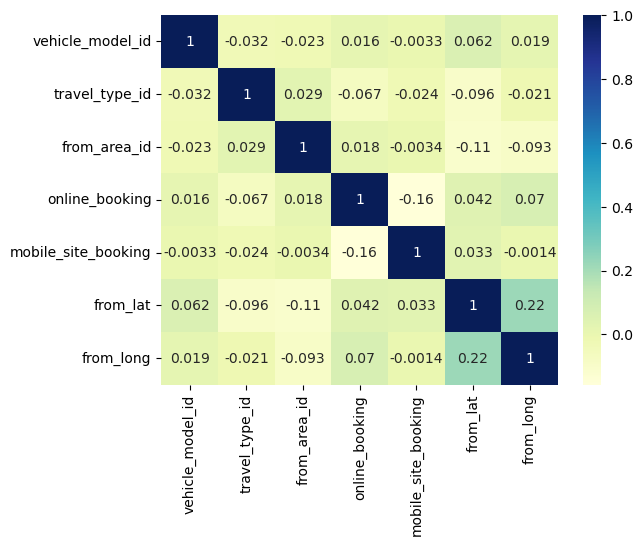

In [39]:
sns.heatmap(xtrain.corr(),annot=True, cmap="YlGnBu")
plt.show()

# Dealing with date time columns

In [40]:
#we will find the difference between the booking time and the trip start time and make a single column out of the difference
#converting object to datetime format
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30401 entries, 12653 to 7624
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     30401 non-null  int64  
 1   travel_type_id       30401 non-null  int64  
 2   from_area_id         30401 non-null  float64
 3   from_date            30401 non-null  object 
 4   online_booking       30401 non-null  int64  
 5   mobile_site_booking  30401 non-null  int64  
 6   booking_created      30401 non-null  object 
 7   from_lat             30401 non-null  float64
 8   from_long            30401 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [41]:
#Converting object to datetime format
xtrain["from_date"]=pd.to_datetime(xtrain["from_date"])
xtrain["booking_created"]=pd.to_datetime(xtrain["booking_created"])
xtest["from_date"]=pd.to_datetime(xtest["from_date"])
xtest["booking_created"]=pd.to_datetime(xtest["booking_created"])


In [42]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30401 entries, 12653 to 7624
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   vehicle_model_id     30401 non-null  int64         
 1   travel_type_id       30401 non-null  int64         
 2   from_area_id         30401 non-null  float64       
 3   from_date            30401 non-null  datetime64[ns]
 4   online_booking       30401 non-null  int64         
 5   mobile_site_booking  30401 non-null  int64         
 6   booking_created      30401 non-null  datetime64[ns]
 7   from_lat             30401 non-null  float64       
 8   from_long            30401 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(4)
memory usage: 2.3 MB


In [43]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13030 entries, 6198 to 38821
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   vehicle_model_id     13030 non-null  int64         
 1   travel_type_id       13030 non-null  int64         
 2   from_area_id         13030 non-null  float64       
 3   from_date            13030 non-null  datetime64[ns]
 4   online_booking       13030 non-null  int64         
 5   mobile_site_booking  13030 non-null  int64         
 6   booking_created      13030 non-null  datetime64[ns]
 7   from_lat             13030 non-null  float64       
 8   from_long            13030 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(4)
memory usage: 1018.0 KB


In [44]:
#subtracting the columns to get a new column
xtrain["diff_booking_and_tripstart_inhrs"]=(xtrain["from_date"]-xtrain["booking_created"]).dt.total_seconds()/60/60
xtrain["diff_booking_and_tripstart_inhrs"]=xtrain["diff_booking_and_tripstart_inhrs"].round(decimals = 3)
xtrain.head()


,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,diff_booking_and_tripstart_inhrs
12653,12,2,393.0,2013-05-08 05:00:00,0,0,2013-05-07 22:20:00,13.199560,77.706880,6.667
7519,85,2,393.0,2013-03-21 22:45:00,0,0,2013-03-21 15:33:00,13.199560,77.706880,7.200
28752,12,2,352.0,2013-08-19 07:30:00,1,0,2013-08-19 00:06:00,13.033690,77.628210,7.400
39437,12,1,1396.0,2013-10-25 22:00:00,0,0,2013-10-25 16:55:00,12.982259,77.636306,5.083
32544,12,2,571.0,2013-09-10 08:00:00,1,0,2013-09-09 18:36:00,12.951850,77.696420,13.400


In [45]:
#doing the same for testing data
xtest["diff_booking_and_tripstart_inhrs"]=(xtest["from_date"]-xtest["booking_created"]).dt.total_seconds()/60/60
xtest["diff_booking_and_tripstart_inhrs"]=xtest["diff_booking_and_tripstart_inhrs"].round(decimals = 3)
xtest.head()

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,diff_booking_and_tripstart_inhrs
6198,12,2,1226.0,2013-03-05 19:45:00,1,0,2013-03-05 10:18:00,13.01508,77.67796,9.450
16415,12,3,722.0,2013-06-02 12:45:00,0,0,2013-06-02 11:39:00,12.91567,77.55465,1.100
24605,12,2,590.0,2013-07-26 16:00:00,0,0,2013-07-26 13:35:00,13.00826,77.56433,2.417
27112,85,1,357.0,2013-08-25 07:30:00,0,0,2013-08-09 20:58:00,13.03064,77.64910,370.533
19316,12,3,376.0,2013-06-23 07:00:00,0,0,2013-06-22 07:35:00,12.90245,77.66081,23.417


In [46]:
#Now we will drop those columns and only keep the column with their differences
xtrain.drop(['from_date', 'booking_created'],inplace=True,axis=1)
xtrain.head()


,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_lat,from_long,diff_booking_and_tripstart_inhrs
12653,12,2,393.0,0,0,13.199560,77.706880,6.667
7519,85,2,393.0,0,0,13.199560,77.706880,7.200
28752,12,2,352.0,1,0,13.033690,77.628210,7.400
39437,12,1,1396.0,0,0,12.982259,77.636306,5.083
32544,12,2,571.0,1,0,12.951850,77.696420,13.400


In [47]:
#dropping for testing data also
xtest.drop(['from_date', 'booking_created'],inplace=True,axis=1)
xtest.head()

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_lat,from_long,diff_booking_and_tripstart_inhrs
6198,12,2,1226.0,1,0,13.01508,77.67796,9.450
16415,12,3,722.0,0,0,12.91567,77.55465,1.100
24605,12,2,590.0,0,0,13.00826,77.56433,2.417
27112,85,1,357.0,0,0,13.03064,77.64910,370.533
19316,12,3,376.0,0,0,12.90245,77.66081,23.417


In [48]:
#again checking datatypes and null values
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30401 entries, 12653 to 7624
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   vehicle_model_id                  30401 non-null  int64  
 1   travel_type_id                    30401 non-null  int64  
 2   from_area_id                      30401 non-null  float64
 3   online_booking                    30401 non-null  int64  
 4   mobile_site_booking               30401 non-null  int64  
 5   from_lat                          30401 non-null  float64
 6   from_long                         30401 non-null  float64
 7   diff_booking_and_tripstart_inhrs  30401 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 2.1 MB


In [49]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13030 entries, 6198 to 38821
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   vehicle_model_id                  13030 non-null  int64  
 1   travel_type_id                    13030 non-null  int64  
 2   from_area_id                      13030 non-null  float64
 3   online_booking                    13030 non-null  int64  
 4   mobile_site_booking               13030 non-null  int64  
 5   from_lat                          13030 non-null  float64
 6   from_long                         13030 non-null  float64
 7   diff_booking_and_tripstart_inhrs  13030 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 916.2 KB


# Correlation Analysis (of the final numerical columns)

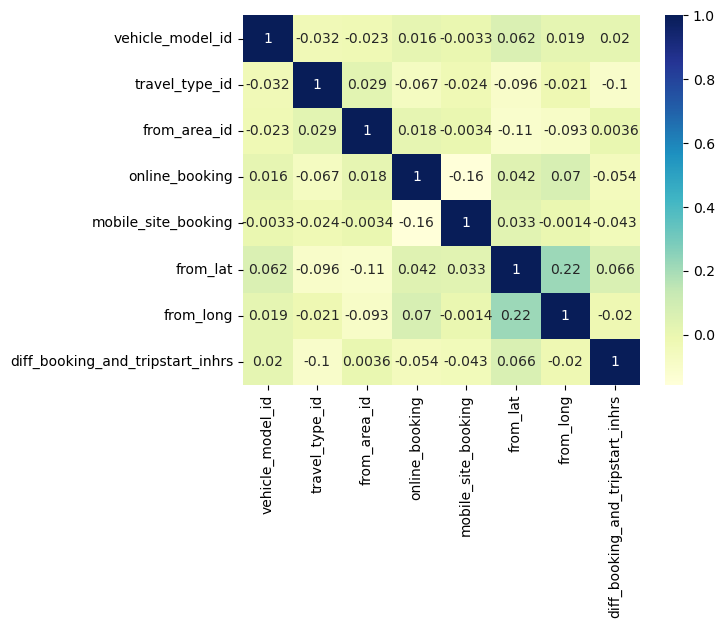

In [50]:
sns.heatmap(xtrain.corr(),annot=True, cmap="YlGnBu")
plt.show()

In [51]:
#since none of the features are in high corr with one another, we are good to go with further analysis

# Visualization

In [52]:
target = df["Car_Cancellation"]

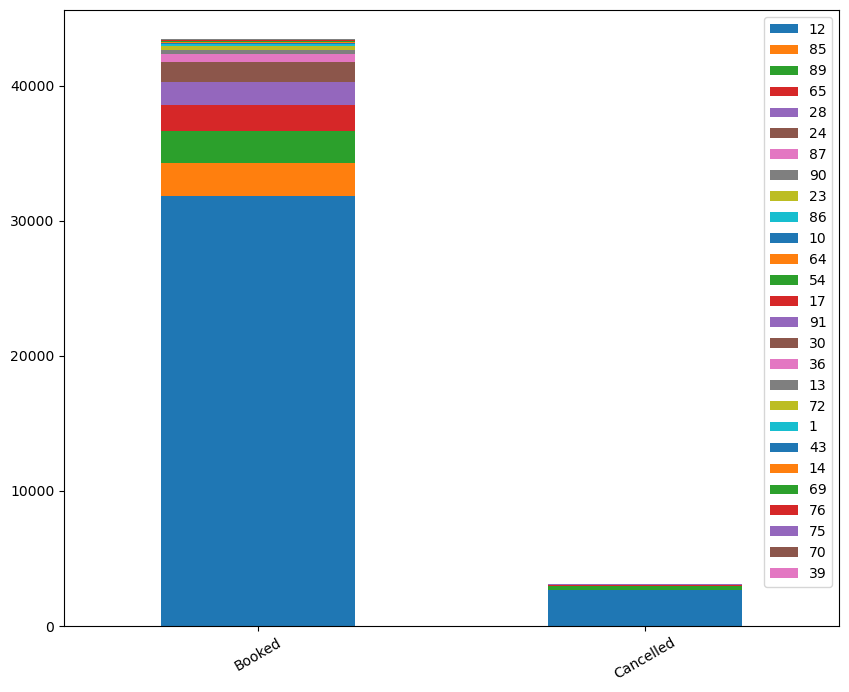

In [53]:
#Analysing vehicle_model_id
bookings= df['vehicle_model_id'].value_counts()
cancelled= df[target==1]['vehicle_model_id'].value_counts()
df1=pd.DataFrame([bookings,cancelled])
df1.index=['Booked','Cancelled']
df1.plot(kind='bar',stacked=True,figsize=(10,8))
plt.xticks(rotation=30)
plt.show()

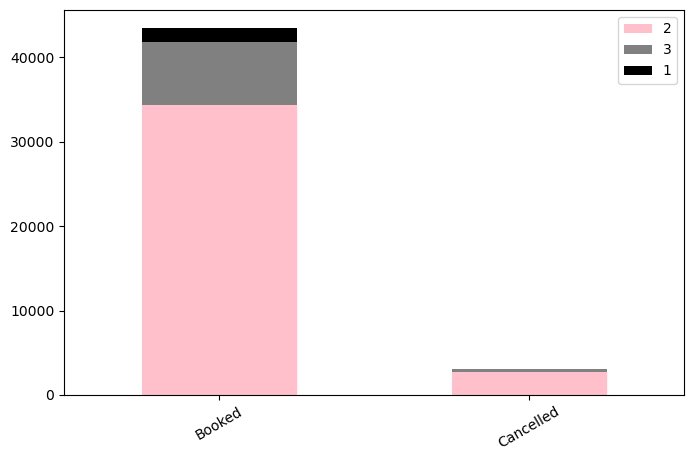

In [54]:
#Analysing travel_type_id
all_bookings= df['travel_type_id'].value_counts()
cancelled= df[target==1]['travel_type_id'].value_counts()
df1=pd.DataFrame([all_bookings,cancelled])
df1.index=['Booked','Cancelled']
df1.plot(kind='bar',stacked=True,figsize=(8,5), color = ["pink", "grey", "black"])
plt.xticks(rotation=30)
plt.show()

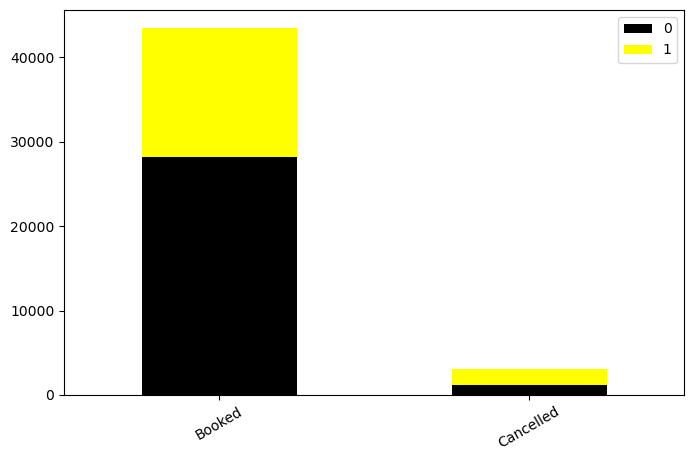

In [55]:
#Analysing online_booking
all_bookings= df['online_booking'].value_counts()
cancelled= df[target==1]['online_booking'].value_counts()
df1=pd.DataFrame([all_bookings,cancelled])
df1.index=['Booked','Cancelled']
df1.plot(kind='bar',stacked=True,figsize=(8,5), color = ["black", "yellow"])
plt.xticks(rotation=30)
plt.show()

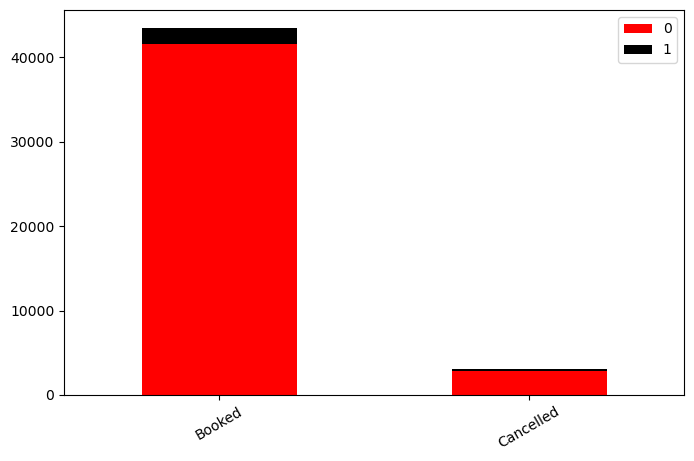

In [56]:
all_bookings= df['mobile_site_booking'].value_counts()
cancelled= df[target==1]['mobile_site_booking'].value_counts()
df1=pd.DataFrame([all_bookings,cancelled])
df1.index=['Booked','Cancelled']
df1.plot(kind='bar',stacked=True,figsize=(8,5), color = ["red", "black"])
plt.xticks(rotation=30)
plt.show()

# Scaling the data (using minmax scaler)

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()
scaler.fit(xtrain)
scaled_features = scaler.transform(xtrain)
scaled_features

array([[0.12222222, 0.5       , 0.27908637, ..., 0.7175091 , 0.80089614,
        0.01532128],
       [0.93333333, 0.5       , 0.27908637, ..., 0.7175091 , 0.80089614,
        0.01559747],
       [0.12222222, 0.5       , 0.24982156, ..., 0.43610737, 0.60397006,
        0.01570111],
       ...,
       [0.12222222, 0.5       , 0.83154889, ..., 0.37957933, 0.85241183,
        0.01943207],
       [0.12222222, 1.        , 0.56459672, ..., 0.4169367 , 0.52063881,
        0.01221215],
       [0.12222222, 0.5       , 0.49036403, ..., 0.33945664, 0.65668728,
        0.01389626]])

In [59]:
scaler1 = MinMaxScaler()
scaler.fit(xtest)
scaled_features1 = scaler.transform(xtest)
scaled_features1

array([[0.02469136, 0.5       , 0.87491065, ..., 0.51049026, 0.72850384,
        0.01484591],
       [0.02469136, 1.        , 0.51465332, ..., 0.29766645, 0.41983529,
        0.0082811 ],
       [0.02469136, 0.5       , 0.42030021, ..., 0.49588953, 0.44406618,
        0.00931653],
       ...,
       [0.02469136, 0.5       , 0.884203  , ..., 0.41935346, 0.58226739,
        0.00942109],
       [0.02469136, 0.5       , 0.13009292, ..., 0.38980946, 0.44166312,
        0.02268201],
       [0.97530864, 0.5       , 0.27948535, ..., 0.90543781, 0.80089614,
        0.00997144]])

In [60]:
xtrain.head()

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_lat,from_long,diff_booking_and_tripstart_inhrs
12653,12,2,393.0,0,0,13.199560,77.706880,6.667
7519,85,2,393.0,0,0,13.199560,77.706880,7.200
28752,12,2,352.0,1,0,13.033690,77.628210,7.400
39437,12,1,1396.0,0,0,12.982259,77.636306,5.083
32544,12,2,571.0,1,0,12.951850,77.696420,13.400


In [61]:
xtest

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_lat,from_long,diff_booking_and_tripstart_inhrs
6198,12,2,1226.0,1,0,13.01508,77.67796,9.450
16415,12,3,722.0,0,0,12.91567,77.55465,1.100
24605,12,2,590.0,0,0,13.00826,77.56433,2.417
27112,85,1,357.0,0,0,13.03064,77.64910,370.533
19316,12,3,376.0,0,0,12.90245,77.66081,23.417
...,...,...,...,...,...,...,...,...
9854,85,3,520.0,1,0,12.92598,77.61837,16.817
14754,28,2,1096.0,0,0,12.96519,77.71932,6.817
3049,12,2,1239.0,0,0,12.97251,77.61954,2.550
18002,12,2,184.0,1,0,12.95871,77.56337,19.417


In [62]:
# Now we are done with the Data Preprocessing and we can go ahead and apply various classification ml algorithms.
#We will apply various algorithms and check the accuracy scores for all to see which one is the best for this problem.

# Applying various ML Algorithms.

# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [64]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(scaled_features, ytrain)

LogisticRegression(random_state=0)

In [65]:
y_pred = log_reg.predict(scaled_features1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
ytest

6198     0
16415    0
24605    0
27112    0
19316    0
        ..
9854     0
14754    0
3049     0
18002    0
38821    0
Name: Car_Cancellation, Length: 13030, dtype: int64

In [67]:
#confusion matrix
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(ytest, y_pred)
c_matrix

array([[12098,     2],
       [  930,     0]], dtype=int64)

[]

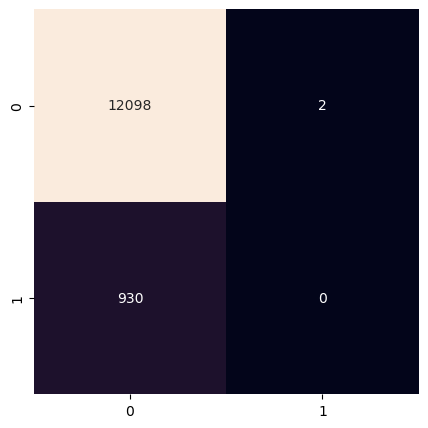

In [68]:
fig, ax = plt.subplots(figsize=(8,5))
c_matrix = confusion_matrix(ytest, y_pred)
nam = np.unique(y_pred)
sns.heatmap(c_matrix, square = True, annot = True, fmt = 'd', cbar = False, xticklabels=nam, yticklabels=nam)
plt.plot()

In [69]:
print("acc_logreg: ", metrics.accuracy_score(ytest, y_pred))

acc_logreg:  0.928472755180353


## We can see here that the accuracy score for logistic regression is 92.8%

#  Naive Bayes 

In [70]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(scaled_features, ytrain)

GaussianNB()

In [71]:
pred = model.predict(scaled_features1)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
ytest

6198     0
16415    0
24605    0
27112    0
19316    0
        ..
9854     0
14754    0
3049     0
18002    0
38821    0
Name: Car_Cancellation, Length: 13030, dtype: int64

[]

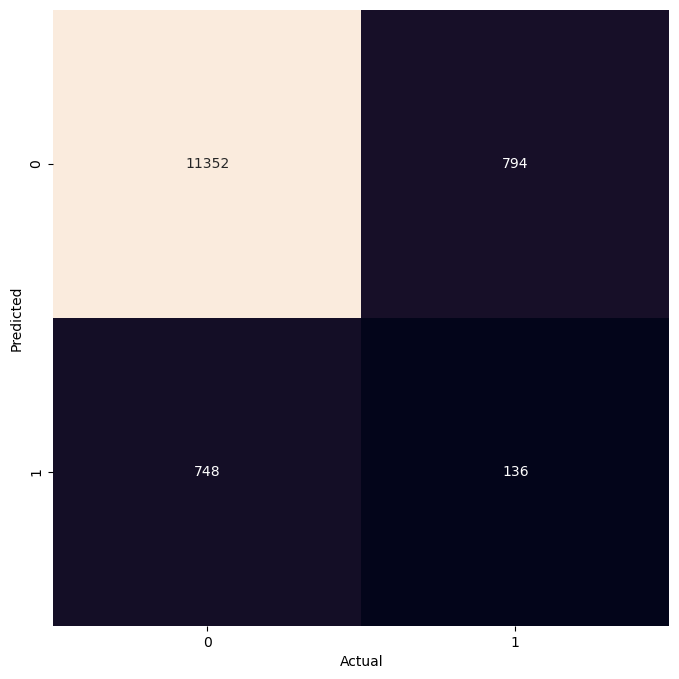

In [73]:
#Plotting confusion matrix
plt.figure(figsize = (10,8))
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False, xticklabels=names, yticklabels=names)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot()

In [74]:
print(metrics.classification_report(pred, ytest))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     12146
           1       0.15      0.15      0.15       884

    accuracy                           0.88     13030
   macro avg       0.54      0.54      0.54     13030
weighted avg       0.88      0.88      0.88     13030



## We can see that the accuracy score using Naive Bayes Algorithm is 88%

# KNN (K-Nearest Neighbour)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn.model_selection import cross_val_score
import warnings;
warnings.filterwarnings('ignore');

In [96]:
#Finding best value of k
training_acc = []
test_acc = []


neighbors = range(1,30)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(scaled_features, ytrain)
    
    training_acc.append(knn.score(scaled_features, ytrain))
    test_acc.append(knn.score(scaled_features1, ytest))

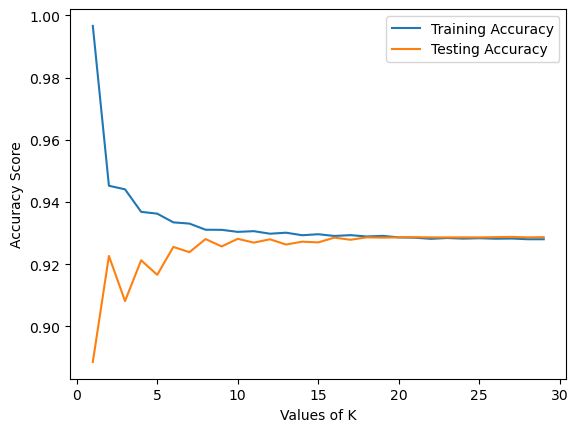

In [98]:
# Plotting the graph for accuracies at various k values till 30
plt.plot(neighbors, training_acc, label = "Training Accuracy")
plt.plot(neighbors, test_acc, label = "Testing Accuracy")
plt.xlabel("Values of K")
plt.ylabel("Accuracy Score")
plt.legend()

In [84]:
# In the above graph, we can see that testing accuracy is the highest and constant after almost 18. Here, we are taking k=21
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(scaled_features, ytrain)
ycap = knn.predict(scaled_features1)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, ycap))

[[12095     5]
 [  924     6]]


[]

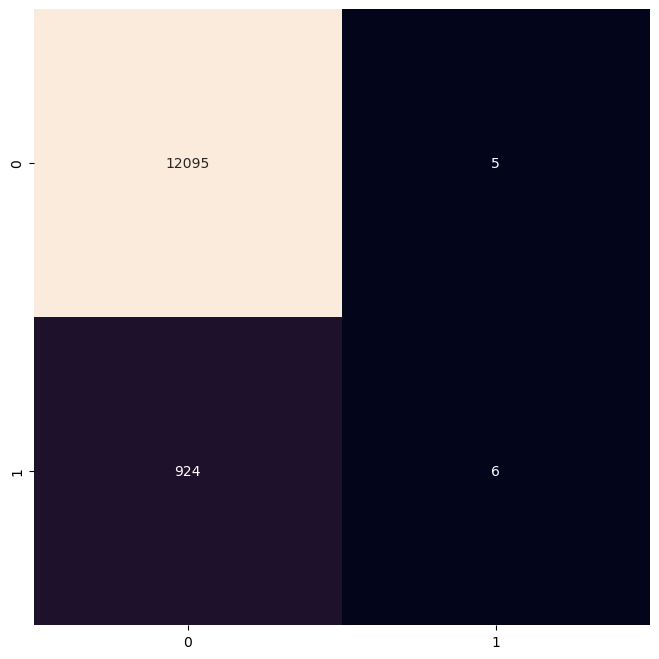

In [86]:
#Plotting confusion matrix heatmap
plt.figure(figsize = (10,8))
hmap = confusion_matrix(ytest, ycap)
names1 = np.unique(ycap)
sns.heatmap(hmap, square = True, annot = True, fmt = 'd', cbar = False, xticklabels=names1, yticklabels=names1)
plt.plot()

In [87]:
print(classification_report(ytest, ycap))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12100
           1       0.55      0.01      0.01       930

    accuracy                           0.93     13030
   macro avg       0.74      0.50      0.49     13030
weighted avg       0.90      0.93      0.90     13030



##  The accuracy score using knn(neighbors=21) is 93%

# Support Vector Machine (SVM)

In [88]:
from sklearn.svm import SVC

In [99]:
svc = SVC()
svc.fit(scaled_features, ytrain)
ynew = svc.predict(scaled_features1)


In [93]:
# Looking for best kernel
kernel = ["linear", "rbf", "poly"]
for i in kernel:
    modl = SVC(kernel=i, C=1.0)
    modl.fit(scaled_features, ytrain)
    print("For kernel:", i)
    print("Accuracy is:", modl.score(scaled_features1, ytest))

For kernel: linear
Accuracy is: 0.9286262471220261
For kernel: rbf
Accuracy is: 0.9286262471220261
For kernel: poly
Accuracy is: 0.9286262471220261


In [ ]:
#Since accuracy rate is same for all, we can go for any kernel.

In [100]:
# checking for best gamma value
gamma_rng = [0.001, 0.01, 0.1, 1, 10]
accsc = []
for g in gamma_rng:
    svc = SVC(kernel = "linear", gamma = g)
    scoress = cross_val_score(svc, scaled_features, ytrain)
    accsc.append(scoress.mean())
print(accsc)

[0.9275681750318074, 0.9275681750318074, 0.9275681750318074, 0.9275681750318074, 0.9275681750318074]


In [ ]:
#gamma value is also same so we can go for any value

In [102]:
svc = SVC(kernel = "linear", C = 1.0, gamma = 0.1)
svc.fit(scaled_features, ytrain)
ynew = svc.predict(scaled_features1)

[]

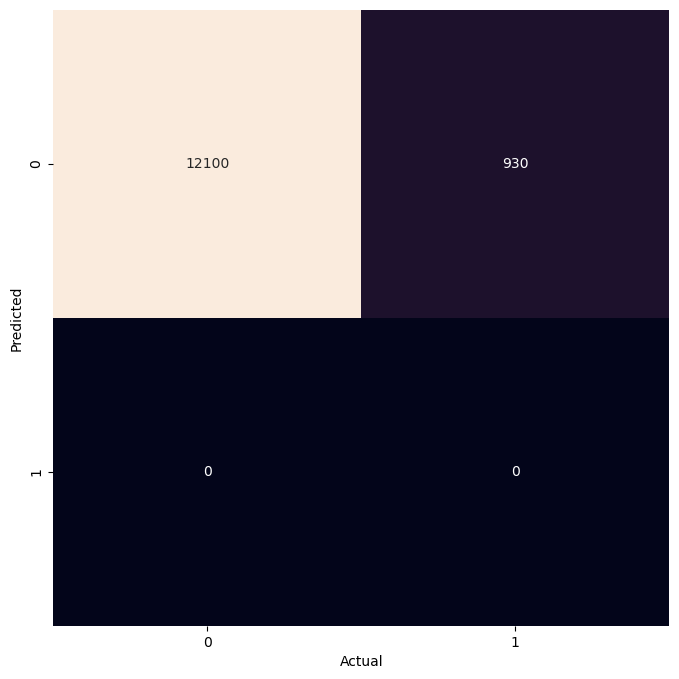

In [104]:
#Plotting confusion matrix
plt.figure(figsize = (10,8))
xx = confusion_matrix(ynew, ytest)
namesl = np.unique(pred)
sns.heatmap(xx, square = True, annot = True, fmt = 'd', cbar = False, xticklabels=namesl, yticklabels=namesl)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot()

In [ ]:
# Checking Accuracy Score

In [103]:
print("Accuracy Score: ")
print(metrics.accuracy_score(ytest, ynew))

Accuracy Score: 
0.9286262471220261


## The accuracy score using SVM is 92.8%

# Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Checking depths 2,4,6,8 for Gini

In [106]:
modeldt1 = DecisionTreeClassifier(max_depth=2)
modeldt1.fit(scaled_features, ytrain)
modeldt1.predict(scaled_features1)
print("Training Accuracy: ", modeldt1.score(scaled_features,ytrain))
print("Testing Accuracy: ", modeldt1.score(scaled_features1, ytest))

Training Accuracy:  0.927568172099602
Testing Accuracy:  0.9286262471220261


In [107]:
modeldt2 = DecisionTreeClassifier(max_depth=4)
modeldt2.fit(scaled_features, ytrain)
prediction = modeldt2.predict(scaled_features1)
print("Training Accuracy: ", modeldt2.score(scaled_features,ytrain))
print("Testing Accuracy: ", modeldt2.score(scaled_features1, ytest))

Training Accuracy:  0.9278971086477419
Testing Accuracy:  0.9287029930928626


In [108]:
modeldt3 = DecisionTreeClassifier(max_depth=6)
modeldt3.fit(scaled_features, ytrain)
modeldt3.predict(scaled_features1)
print("Training Accuracy: ", modeldt3.score(scaled_features,ytrain))
print("Testing Accuracy: ", modeldt3.score(scaled_features1, ytest))

Training Accuracy:  0.9292128548403014
Testing Accuracy:  0.9250191864927091


In [109]:
modeldt4 = DecisionTreeClassifier(max_depth=8)
modeldt4.fit(scaled_features, ytrain)
modeldt4.predict(scaled_features1)
print("Training Accuracy: ", modeldt4.score(scaled_features,ytrain))
print("Testing Accuracy: ", modeldt4.score(scaled_features1, ytest))

Training Accuracy:  0.9345416269201671
Testing Accuracy:  0.9207214121258634


In [ ]:
# Checking depths 2,4,6,8 for Entropy

In [110]:
modeldt1e = DecisionTreeClassifier(max_depth=2, criterion="entropy")
modeldt1e.fit(scaled_features, ytrain)
modeldt1e.predict(scaled_features1)
print("Training Accuracy: ", modeldt1e.score(scaled_features, ytrain))
print("Testing Accuracy: ", modeldt1e.score(scaled_features1, ytest))

Training Accuracy:  0.927568172099602
Testing Accuracy:  0.9286262471220261


In [111]:
modeldt2e = DecisionTreeClassifier(max_depth=4, criterion="entropy")
modeldt2e.fit(scaled_features, ytrain)
modeldt2e.predict(scaled_features1)
print("Training Accuracy: ", modeldt2e.score(scaled_features, ytrain))
print("Testing Accuracy: ", modeldt2e.score(scaled_features1, ytest))

Training Accuracy:  0.9278313213381139
Testing Accuracy:  0.9286262471220261


In [112]:
modeldt3e = DecisionTreeClassifier(max_depth=6, criterion="entropy")
modeldt3e.fit(scaled_features, ytrain)
modeldt3e.predict(scaled_features1)
print("Training Accuracy: ", modeldt3e.score(scaled_features, ytrain))
print("Testing Accuracy: ", modeldt3e.score(scaled_features1, ytest))

Training Accuracy:  0.9285878753988356
Testing Accuracy:  0.9279355333844973


In [113]:
modeldt4e = DecisionTreeClassifier(max_depth=8, criterion="entropy")
modeldt4e.fit(scaled_features, ytrain)
modeldt4e.predict(scaled_features1)
print("Training Accuracy: ", modeldt4e.score(scaled_features, ytrain))
print("Testing Accuracy: ", modeldt4e.score(scaled_features1, ytest))

Training Accuracy:  0.9332916680372356
Testing Accuracy:  0.9202609363008442


In [ ]:
# Here we are getting almost 92% accuracy for testing data for each value of gini and entropy (with different depths).
# We will go for gini, depth = 4

In [114]:
print(confusion_matrix(ytest, prediction))

[[12095     5]
 [  924     6]]


[]

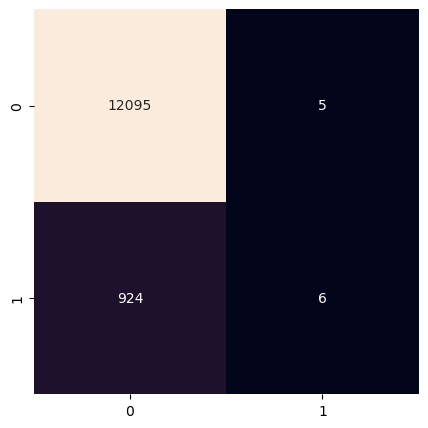

In [115]:
fig, ax = plt.subplots(figsize=(8,5))
c_matrix12 = confusion_matrix(ytest, prediction)
nam11 = np.unique(prediction)
sns.heatmap(c_matrix12, square = True, annot = True, fmt = 'd', cbar = False, xticklabels=nam11, yticklabels=nam11)
plt.plot()

## For Decision Tree Algorithm, we are getting 92.8% testing accuracy

### KNN gives us the highest accuracy score at 93%. So we will go for KNN for this particular dataset.

In [116]:
# We will give the inputs (from final dataset features) to check the prediction

ipdata = (12,2,393.0,0,0,13.199560,77.706880,6.667)
ipdataarray = np.asarray(ipdata)   #coverting to a numpy array
ipdatareshaped = ipdataarray.reshape(1,-1)    #reshaping
res = knn.predict(ipdatareshaped)
res

array([0], dtype=int64)

In [118]:
if (res[0] == 0):
    print("Prediction says: The booking will not be cancelled")
    
else:
    print("Prediction says: The booking will be cancelled")

Prediction says: The booking will not be cancelled


# This completes the project.